## Cubic Grids

Cubic grids are commonly found in many other packages and are useful for visualization, interpolation and integration purposes.

In Grid, it offers two classes for constructing these cubic (or Hyper-rectangular) grids in three-dimensions:

- [Tensor1DGrids](../pyapi/grid.cubic.rst#grid.cubic.Tensor1DGrids) : Tensor product of three one-dimensional grids.
- [UniformGrid](../pyapi/grid.cubic.rst#grid.cubic.UniformGrid) : Evenly spaced grid in three axes.

See their API documentation for more information about the classes.
This example illustrates how to use these grid classes for both visualization, interpolation (including differentiation), and integration, with a focus on usage in quantum chemistry.  It is recommended for general usage to use the Tensor1DGrids and for quantum chemistry applications, to use the UniformGrid class. 


### Tensor 1D Grids
The first grid is a tensor combination of three grids with points $\{p^1_i\}, \{p^2_i\}, \{p^3_i\}$ and weights $\{w^1_i\}, \{w^2_i\}, \{w^3_i\}$ such that the new set of points are $\{(p^1_i, p^2_j, p^3_k)\}$ with weights $\{w^1_i \times w^2_j \times w^3_k\}$.

In [1]:
%matplotlib inline
from grid.onedgrid import UniformInteger
from grid.rtransform import LinearInfiniteRTransform
from grid.cubic import Tensor1DGrids
import numpy as np

limit = 10
# Construct a grid between -10 and 10 on the real line.
npoints = 50
oned_gridx = UniformInteger(npoints)
oned_gridx = LinearInfiniteRTransform(-limit, limit).transform_1d_grid(oned_gridx)

# Construct another grid between -0.5 and 0.5 on the real line
npoints = 45
oned_gridy = UniformInteger(npoints)
oned_gridy = LinearInfiniteRTransform(-limit, limit).transform_1d_grid(oned_gridy)

# Construct another grid between -10 and 10 on the real line
npoints = 55
oned_gridz = UniformInteger(npoints)
oned_gridz = LinearInfiniteRTransform(-limit, limit).transform_1d_grid(oned_gridz)

# Constructing the tensor product grid.
tensor_grid = Tensor1DGrids(oned_gridx, oned_gridy, oned_gridz)

Each of the individual grids axes are plotted.

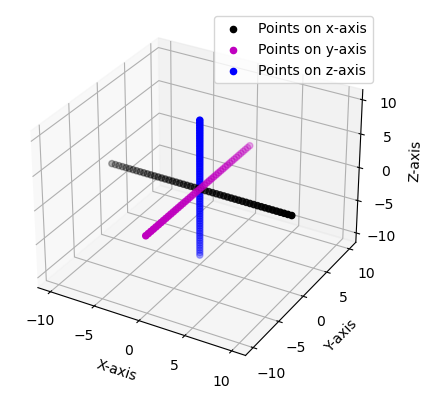

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(oned_gridx.points, [0] *  len(oned_gridx.points), [0] *  len(oned_gridx.points), color="k", label="Points on x-axis")
ax.scatter( [0] *  len(oned_gridy.points), oned_gridy.points, [0] *  len(oned_gridy.points), color="m", label="Points on y-axis")
ax.scatter( [0] *  len(oned_gridz.points), [0] *  len(oned_gridz.points), oned_gridz.points , color="b", label="Points on z-axis")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.show()


The Tensor1DGrids can now be easily constructed by passing in each of the three one-dimensional grids.  These are then plotted

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


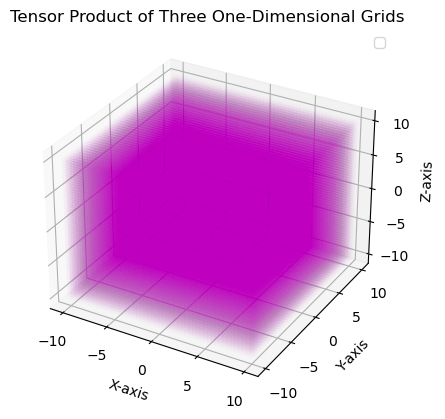

Points of the grid: [[-10.         -10.         -10.        ]
 [-10.         -10.          -9.62962963]
 [-10.         -10.          -9.25925926]
 ...
 [ 10.          10.           9.25925926]
 [ 10.          10.           9.62962963]
 [ 10.          10.          10.        ]]
Weights of the grid: [0.06871435 0.06871435 0.06871435 ... 0.06871435 0.06871435 0.06871435].
The number of points: 123750
The number of dimensions: 3.
The origin of the grid: [-10. -10. -10.].
The shape of the grid: (50, 45, 55).
Coordinate of the fifth point: (0, 0, 5).
Index of the (0, 0, 5) coordinate: 5.


In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(tensor_grid.points[:, 0], tensor_grid.points[:, 1], tensor_grid.points[:, 2], color="m", alpha=0.01)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.legend()
plt.title("Tensor Product of Three One-Dimensional Grids")
plt.show()

print(f"Points of the grid: {tensor_grid.points}")
print(f"Weights of the grid: {tensor_grid.weights}.")
print(f"The number of points: {tensor_grid.size}")
print(f"The number of dimensions: {tensor_grid.ndim}.")
print(f"The origin of the grid: {tensor_grid.origin}.")
print(f"The shape of the grid: {tensor_grid.shape}.")

# Conversion from indices i to coordinates (i, j, k) to points
coordinate = tensor_grid.index_to_coordinates(5)
print(f"Coordinate of the fifth point: {coordinate}.")
index = tensor_grid.coordinates_to_index((0, 0, 5))
print(f"Index of the (0, 0, 5) coordinate: {index}.")

#### Example 1: Interpolation
This example will attempt to interpolate a Gaussian, first on a subset of the points used for interpolation then later on random set of points.

In [4]:
# Interpolation of a Gaussian
gaussian = lambda pts: np.exp(-np.linalg.norm(pts, axis=1)**2.0)
gaus_vals = gaussian(tensor_grid.points)

# Interpolation evaluated on subset of the same points used for interpolation
subset = tensor_grid.points[np.random.choice(range(tensor_grid.size), 10)]
true_vals = gaussian(subset)

print("Interpolate using linear method.")
interpol = tensor_grid.interpolate(subset, gaus_vals, use_log=False, method="linear")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")

print("Interpolate using linear method applying the logarithm.")
interpol = tensor_grid.interpolate(subset, gaus_vals, use_log=True, method="linear")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")

print("Interpolate using cubic splines")
interpol = tensor_grid.interpolate(subset, gaus_vals, use_log=False, method="cubic")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")

print("Inteprolate using cubic splines appling the logarithm")
interpol = tensor_grid.interpolate(subset, gaus_vals, use_log=True, method="cubic")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")


Interpolate using linear method.
The errors are:  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Maximum error is 0.0 

Interpolate using linear method applying the logarithm.
The errors are:  [109.51563113 160.55118167  87.90759427 132.92212811  28.2360202
  30.38854728  51.89027875 188.05730603  71.62541671 119.86972529]
Maximum error is 188.05730602930004 

Interpolate using cubic splines
The errors are:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.25271501e-58
 0.00000000e+00 0.00000000e+00]
Maximum error is 2.2527150091805644e-58 

Inteprolate using cubic splines appling the logarithm
The errors are:  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.81414959e-95
 0.00000000e+00 0.00000000e+00]
Maximum error is 1.814149587443227e-95 


In [5]:
# Interpolate at random set of points
random_pts = np.random.uniform(-1, 1, (25, 3))
true_vals = gaussian(random_pts)

print("Interpolate using linear method.")
interpol = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, method="linear")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")
# The logarithm is first applied to the Gaussian functions to be easier to interpolate at.
print("Interpolate using linear method applying the logarithm.")
interpol = tensor_grid.interpolate(random_pts, gaus_vals, use_log=True, method="linear")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")
# Rather then interpolate using linearly, this used the cubic
print("Interpolate using cubic splines")
interpol = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, method="cubic")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")
# Same as above but the logarithm is applied.
print("Inteprolate using cubic splines appling the logarithm")
interpol = tensor_grid.interpolate(random_pts, gaus_vals, use_log=True, method="cubic")
print("The errors are: ", np.abs(interpol - true_vals))
print(f"Maximum error is {np.max(np.abs(interpol - true_vals))} \n")


Interpolate using linear method.
The errors are:  [0.00762301 0.00072389 0.04189685 0.00615479 0.00460213 0.01252948
 0.01154497 0.00324464 0.00586208 0.00310639 0.00468367 0.00819824
 0.00058217 0.01631226 0.02346399 0.05711565 0.03493362 0.00631962
 0.02893594 0.00088144 0.01024546 0.01395122 0.00196078 0.00324154
 0.00393392]
Maximum error is 0.05711565021441589 

Interpolate using linear method applying the logarithm.
The errors are:  [1.56252733 2.0919613  1.10363956 2.02069628 1.74126166 1.54282715
 1.52296338 1.67261231 1.43564411 1.43747026 1.94046182 1.38540404
 1.99715009 1.51153108 1.45072155 1.15441381 1.18377497 1.38674244
 1.28161146 1.93556757 1.55871764 1.43871707 1.86225875 1.90013389
 1.57407673]
Maximum error is 2.0919613014849827 

Interpolate using cubic splines
The errors are:  [8.04757815e-05 2.95558651e-04 8.32406727e-04 2.30458878e-04
 8.77358627e-05 3.42542642e-04 3.07144244e-04 4.06045343e-04
 7.03536680e-04 2.75901214e-05 3.12220147e-04 7.39605434e-04
 2.165

In [6]:
# Derivative can be interpolated
# X-derivative
deriv_x = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, nu_x=1, nu_y=0, nu_z=0, method="cubic")
print(f"Derivative in x-direction {deriv_x}.")
# Y-derivative
deriv_y = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, nu_x=0, nu_y=1, nu_z=0, method="cubic")
# Z-derivative
deriv_z = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, nu_x=0, nu_y=0, nu_z=1, method="cubic")
# XY- derivative
deriv_xy = tensor_grid.interpolate(random_pts, gaus_vals, use_log=False, nu_x=1, nu_y=1, nu_z=0, method="cubic")
# The logarithm can be used to interpolate derivatives on single points only (mixed derivative are not supported)
derivs = []
for pt in random_pts:
    deriv_x = tensor_grid.interpolate(np.array([pt]), gaus_vals, use_log=True, nu_x=1, nu_y=0, nu_z=0, method="cubic")
    derivs.append(deriv_x[0])
print(f"Derivative (using logarithm) in x-direction {np.array(derivs)}.")

Derivative in x-direction [-0.1586916  -0.31349776  0.33935696  0.06466445  0.40419959 -0.61451247
 -0.62655933 -0.0551694  -0.46773268 -0.12449967 -0.07667272 -0.18030915
 -0.16017033 -0.07780941  0.7230526   0.1142328  -0.18967248 -0.4813274
 -0.5302537   0.31370182 -0.52812715 -0.34614369  0.09955806  0.30876539
 -0.0155979 ].
Derivative (using logarithm) in x-direction [-0.15829513 -0.31113292  0.3416159   0.0654575   0.40442946 -0.61151215
 -0.6232794  -0.0574052  -0.46998893 -0.12692017 -0.07725037 -0.18114109
 -0.15972695 -0.08100128  0.71968139  0.11976418 -0.19530678 -0.48471689
 -0.53091092  0.31325067 -0.52839647 -0.34519661  0.09943409  0.30928535
 -0.01641829].


#### Example 2: Visualization of $2p_{z}$ Orbital using Tensor 1D Grid

Given a function $f(x, y, z)$, (e.g. an atomic orbital or electron density) we can evaluate it on a cubic grid and visualize the distribution of the function in space using isosurface values. Here we define a function that plots every point in the grid with a corresponding absolute value of the function greater than a threshold value. The function is latter used to visualize the $2p_{z}$ orbital.


##### i. Utility Function For Plotting Isosurfaces

In [7]:
# Function to plot grid points bigger than a given threshold
def plot_isosurface(
    grid, vals, isovalue, *, both_signs=True, at_data=None, noticks=False, title=None
):
    """Plot grid points with values bigger than isovalue.

    The function plots the grid points with absolute values bigger than isovalue.

    Parameters
    ----------
    grid : Grid
        Cartesian grid (it can be uniform or TensorProductGrid) with 3 dimensions.
    vals : ndarray
        Values of the function on the grid points.
    isovalue : float
        Value of the isosurface to plot.
    both_signs : bool, optional
        If True, plot points with negative values too. The default is True.
    at_data : tuple, optional
        Tuple containing the atomic coordinates and atomic labels. If not None,
        it should be a tuple containing (atcoords, atlabels) where atcoords is
        a ndarray of shape (natoms, 3) containing the atomic coordinates in
        bohr and atlabels is a list of length natoms containing the atomic labels.
    title : str, optional
        Title of the plot. The default is None.
    """
    # indices of points with values close to isovalue
    idx_p_vals = np.where(vals > isovalue)
    idx_n_vals = np.where(vals < -isovalue)

    # points with values close to isovalue
    p_pts = grid.points[idx_p_vals]
    n_pts = grid.points[idx_n_vals]

    xmin, xmax = np.min(grid.points[:, 0]), np.max(grid.points[:, 0])
    ymin, ymax = np.min(grid.points[:, 1]), np.max(grid.points[:, 1])
    zmin, zmax = np.min(grid.points[:, 2]), np.max(grid.points[:, 2])

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    if noticks:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

    if at_data is not None:
        if len(at_data) != 2:
            raise ValueError("at_data should be a tuple containing (atcoords, atlabels)")

        atcoords, atlabels = at_data
        if atcoords.shape[0] != len(atlabels):
            raise ValueError("atcoords and atlabels should have the same length")

        # if there are more than 2 atoms set the view point perpendicular to the molecular plane
        if len(atlabels) > 2:
            # Calculate the centroid of atomic coordinates
            centroid = np.mean(atcoords, axis=0)
            # Center the atomic coordinates by subtracting the centroid from each point
            centered_coords = atcoords - centroid
            # Perform Singular Value Decomposition (SVD) on the centered coordinates
            _, _, V = np.linalg.svd(centered_coords)
            # The normal vector the molecular plane is the last column of the V matrix
            normal_vector = V[-1]
            # Set the view point perpendicular to the plane
            ax.view_init(
                elev=np.degrees(np.arcsin(normal_vector[2])),
                azim=np.degrees(np.arctan2(normal_vector[1], normal_vector[0])),
            )

        # plot the atomic centers
        for i in range(len(atlabels)):
            ax.text(
                atcoords[i, 0],
                atcoords[i, 1],
                atcoords[i, 2],
                atlabels[i],
                color="k",
                fontsize=12,
                horizontalalignment="center",
                verticalalignment="center",
            )
    # set axis limits
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))
    ax.set_zlim((zmin, zmax))
    
    # plot points with values bigger than isovalue
    ax.scatter(
        p_pts[:, 0], p_pts[:, 1], p_pts[:, 2], alpha=0.01, color="r", label=f"Positive values"
    )
    if both_signs:
        ax.scatter(
            n_pts[:, 0], n_pts[:, 1], n_pts[:, 2], alpha=0.01, color="b", label=f"Negative values"
        )
    legend = plt.legend(loc="upper right")
    for lh in legend.legendHandles:
        lh.set_alpha(1)
    ax.set_xlabel("X-axis")
    ax.set_ylabel("Y-axis")
    ax.set_zlabel("Z-axis")
    if title is not None:
        plt.title(title)
    plt.show()

##### ii. Plot $2p_{z}$ orbital from isosurface value

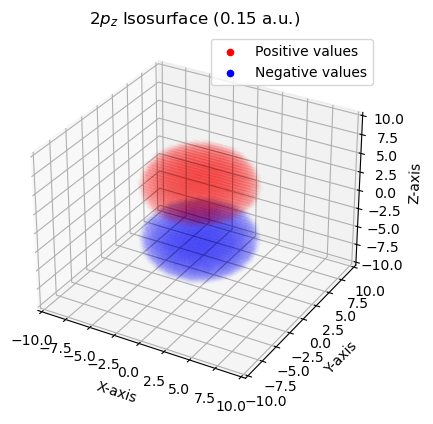

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# define 2pz orbital function
def psi_2pz(x, y, z, a_0):
    r = np.sqrt(x**2 + y**2 + z**2)
    return np.exp(-r / (2 * a_0)) * z


# Evaluate the function on the grid.
psi_vals = psi_2pz(*tensor_grid.points.T, a_0=1.0)

point_idx = target_x = 0.15
tolerance = 1e-2

plot_isosurface(tensor_grid, psi_vals, target_x, title="$2p_{z}$ Isosurface (0.15 a.u.)")

### Uniform Grid

This is type of cubic grid (a.k.a. rectilinear grid) with evenly-spaced points in each axes.  It supports the same properties and functions as Tensor1DGrids.  


#### Example 1: Constructing Uniform Grid Around Formaldehyde Anion


This example illustates the use of Grid with the [IOData](https://github.com/theochem/iodata) package to construct a default grid around a molecule. 
The easiest method to do so is the "from_molecule" method.  This example will showcase this for Formaldehyde anion. The `.fchk` files of which are read using the [IOData](https://github.com/theochem/iodata) package and the `.fchk` files are included in `doc/notebooks/ch2o_q-1.fchk`.

Atomic Coordinates 
 [[-1.23259516e-32  1.00530930e-32  1.27229733e+00]
 [ 0.00000000e+00 -1.32254311e-32 -9.95825669e-01]
 [ 0.00000000e+00  1.77311490e+00 -2.10171229e+00]
 [-2.17143949e-16 -1.77311490e+00 -2.10171229e+00]]
Atomic Numbers: 
 [8 6 1 1]


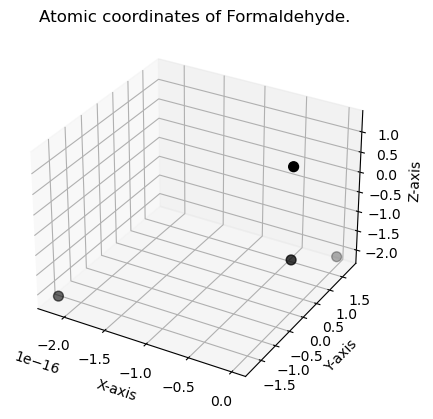

In [9]:
from iodata import load_one

# Load the wavefunction information about ch2o
mol_anion = load_one("ch2o_q-1.fchk")

# Get the atomic coordinates and numbers
atcoords = mol_anion.atcoords
atnums = mol_anion.atnums
print(f"Atomic Coordinates \n {atcoords}")
print(f"Atomic Numbers: \n {atnums}")

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(atcoords[:, 0], atcoords[:, 1], atcoords[:, 2], color="k", s=50)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.title("Atomic coordinates of Formaldehyde.")
plt.show()


The number of points: 224960
The number of dimensions: 3.
The shape of the grid: [74 76 40].
The origin of the grid: [-2.   3.8 -3.7].
The axes of the grid: [[ 0.00000000e+00  0.00000000e+00  1.00000000e-01]
 [ 0.00000000e+00 -1.00000000e-01  0.00000000e+00]
 [ 1.00000000e-01  1.11022302e-17  0.00000000e+00]].


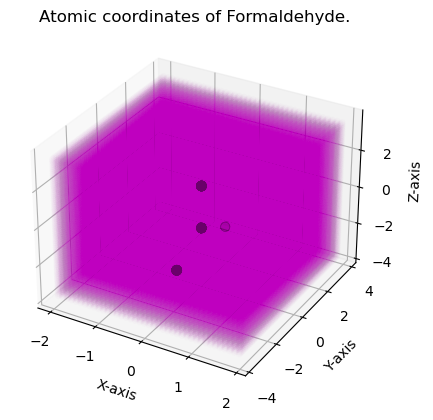

In [10]:
from grid.cubic import UniformGrid

# Construct uniform grid
uniform_grid = UniformGrid.from_molecule(atnums, atcoords, spacing=0.1, extension=2.0, rotate=True)


print(f"The number of points: {uniform_grid.size}")
print(f"The number of dimensions: {uniform_grid.ndim}.")
print(f"The shape of the grid: {uniform_grid.shape}.")
print(f"The origin of the grid: {uniform_grid.origin}.")
print(f"The axes of the grid: {uniform_grid.axes}.")


fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(atcoords[:, 0], atcoords[:, 1], atcoords[:, 2], color="k", s=50)
ax.scatter(uniform_grid.points[:, 0], uniform_grid.points[:, 1], uniform_grid.points[:, 2], color="m", alpha=0.01)
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
plt.title("Atomic coordinates of Formaldehyde.")
plt.show()

#### Example 2: Calculate and Visualize Dual Descriptor of Formaldehyde
This example will illusrate on how to use UniformGrid to compute and visualize the dual descriptor of formaldehyde. The dual descriptor is a function of electron density and its derivatives and is defined as:

$$f^{(2)}(r) = \Delta f(r) = (f^{+}(r) - f^{-}(r)$$

where $f^{+}(r)$ and $f^{-}(r)$ are the Fukui functions defined as:

$$f^{+}(r) = \left(\frac{\partial \rho(r)}{\partial \rho^2}\right)^{+}_{\upsilon(r)} = \rho_{N+1}(r) - \rho_{N}(r)$$

$$f^{-}(r) = \left(\frac{\partial \rho(r)}{\partial \rho^2}\right)^{-}_{\upsilon(r)} = \rho_{N}(r) - \rho_{N-1}(r)$$

then $f^{(2)}(r)$ can be written as:

$$f^{(2)}(r) = \rho_{N+1}(r) - \rho_{N-1}(r)$$


##### i. Define utility function to calculate the dual descriptor
The dual descriptor is evaluated at each grid point as the difference between the electron density of the anion and cation of formaldehyde. The electron density can be evaluated in the grid points using the [GBasis](https://github.com/theochem/gbasis) package with the wavefunction read, as above.


In [11]:
from gbasis.evals.density import evaluate_density

# define function to compute dual descriptor on a grid
def compute_dual_descriptor(grid, rdm_an, rdm_cat, basis_an, basis_cat, type_an, type_cat):
    """Compute dual descriptor on a grid.

    Parameters
    ----------
    grid : Grid
        Grid object.
    rdm_an : np.ndarray
        1-RDM of the anion.
    rdm_cat : np.ndarray
        1-RDM of the cation.
    basis_an : list
        Basis set of the anion.
    basis_cat : list
        Basis set of the cation.
    type_an : str
        Coordinate type of the anion.
    type_cat : str
        Coordinate type of the cation.
    """
    # evaluate electron density of cation and anion on the grid
    dens_vals_cat = evaluate_density(rdm_cat, basis_cat, grid.points, coord_type=type_cat)
    dens_vals_an = evaluate_density(rdm_an, basis_an, grid.points, coord_type=type_an)

    # compute dual descriptor on the grid
    return dens_vals_an - dens_vals_cat

##### ii. Calculate and visualize dual descriptor


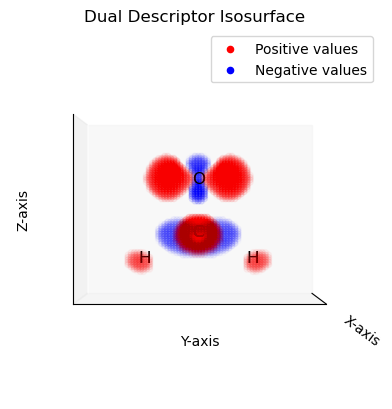

Positive values (red) correspond to nucleophilic regions
Negative values (blue) correspond to electrophilic regions


In [12]:
from iodata import load_one
from gbasis.wrappers import from_iodata

# load formaldehyde cation and anion fchk files
mol_cation = load_one("ch2o_q+1.fchk")

# Construct molecular basis from wave-function information read by IOData
basis_cat, type_cat = from_iodata(mol_cation)
basis_an, type_an = from_iodata(mol_anion)

# get rdms for cation and anion
rdm_cat = mol_cation.one_rdms["scf"]
rdm_an = mol_anion.one_rdms["scf"]

# compute dual descriptor on the grid
dd = compute_dual_descriptor(uniform_grid, rdm_an, rdm_cat, basis_an, basis_cat, type_an, type_cat)

# plot dual descriptor isosurface
mol_data = (atcoords, ["O", "C", "H", "H"])
plot_isosurface(
    uniform_grid, dd, 0.03, at_data=mol_data, title="Dual Descriptor Isosurface", noticks=True
)

print(f"Positive values (red) correspond to nucleophilic regions")
print(f"Negative values (blue) correspond to electrophilic regions")

#### Example 3: Integrate The Dual Descriptor Domains

All classes in [Grid](https://github.com/theochem/grid) offers an easy method to integrate. Here we integrate the different lobes of the dual descriptor. This can be used to assess the relevance of electrophilic and nucleophilic regions of the molecule.

##### i. Define utility function to extract dual descriptor domains

In [13]:
# define utility function for grouping grid points in domains
from itertools import combinations
from scipy.sparse.csgraph import connected_components


# function to get grid points indices for same sign connected points with absolute
# value  greater than a threshold (select domain defined by isovalue)
def get_domains(grid, vals, isovalue):
    """Get grid points indices for domains with same sign connected points.

    The function returns the indices of the grid points that belong to the same domain. A domain
    is defined by a set of connected points with the same sign and absolute value greater than
    isovalue.

    Parameters
    ----------
    grid : Grid
        Cartesian grid (it can be uniform or TensorProductGrid) with 3 dimensions.
    vals : ndarray
        Values of the function on the grid points.
    isovalue : float
        Value of the isosurface used to define the domains.

    Returns
    -------
    tuple
        Tuple containing two lists. The first list contains domains with positive values and the
        second list contains domains with negative values. Each domain is a np.array with the
        indexes of the grid points that belong to the same domain.
    """
    # indices of points with value modulus greater than isovalue
    idx_p_vals = np.where(vals > isovalue)[0]  # positive values
    idx_n_vals = np.where(vals < -isovalue)[0]  # negative values

    # create adjacency matrix selected points with same sign
    p_vals_adj = np.zeros((len(idx_p_vals), len(idx_p_vals)))
    n_vals_adj = np.zeros((len(idx_n_vals), len(idx_n_vals)))

    # try all combinations of selected points with same sign (positive values)
    for i, j in combinations(range(len(idx_p_vals)), 2):
        # get coordinate indices of the points
        i_coord_idx = np.array(grid.index_to_coordinates(idx_p_vals[i]))
        j_coord_idx = np.array(grid.index_to_coordinates(idx_p_vals[j]))
        # two points are adjacent if they differ by at most 1 in each coordinate index
        if np.max(np.abs(i_coord_idx - j_coord_idx)) == 1:
            p_vals_adj[i, j] = 1

    # try all combinations of selected points with same sign (negative values)
    for i, j in combinations(range(len(idx_n_vals)), 2):
        i_coord_idx = np.array(grid.index_to_coordinates(idx_n_vals[i]))
        j_coord_idx = np.array(grid.index_to_coordinates(idx_n_vals[j]))
        # two points are adjacent if they differ by at most 1 in each coordinate
        if np.max(np.abs(i_coord_idx - j_coord_idx)) == 1:
            n_vals_adj[i, j] = 1

    # returns an array of integers, each integer represents domain and the indexes where
    # it appear are the points belonging to that domain
    # example: [0,1,0,0,1,1] -> points 0,2,3 belong to domain 0
    #                        -> points 1,4,5 belong to domain 1
    p_groups = connected_components(p_vals_adj, directed=False)[1]
    n_groups = connected_components(n_vals_adj, directed=False)[1]

    # creates a list with the domains. Each element of the list is a np.array with the indexes
    # of the selected points that belong to the same domain.
    # example: [0,1,0,0,1,1] -> [[0,2,3],[1,4,5]]
    p_domains = list([np.where(p_groups == i)[0] for i in range(max(p_groups) + 1)])
    n_domains = list([np.where(n_groups == i)[0] for i in range(max(n_groups) + 1)])

    # transform indexes of selected points to indexes of all grid points for each domain
    p_domains = [idx_p_vals[domain] for domain in p_domains]
    n_domains = [idx_n_vals[domain] for domain in n_domains]

    return p_domains, n_domains

##### ii. Select and integrate the positive (electrophilic) domains of the dual descriptor


In [14]:
# get dual descriptor domains, integrate and plot them
p_domains, n_domains = get_domains(uniform_grid, dd, 0.03)

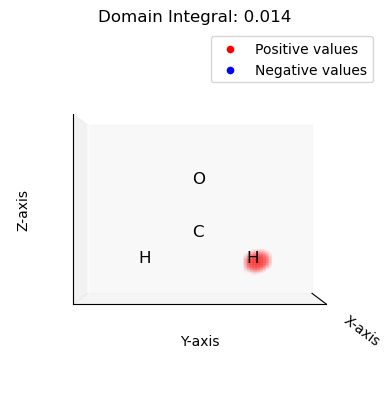

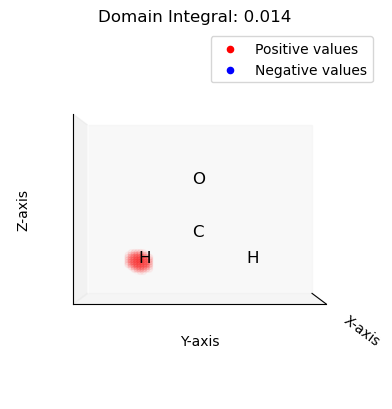

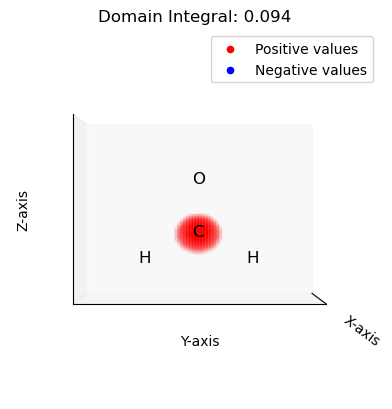

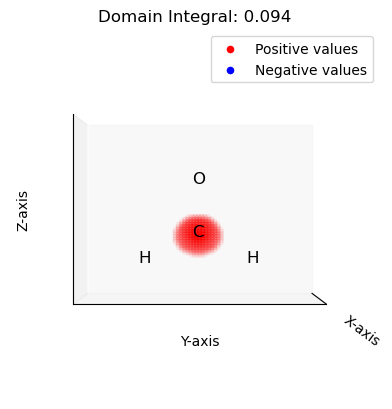

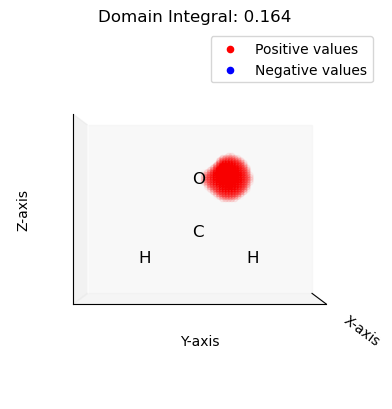

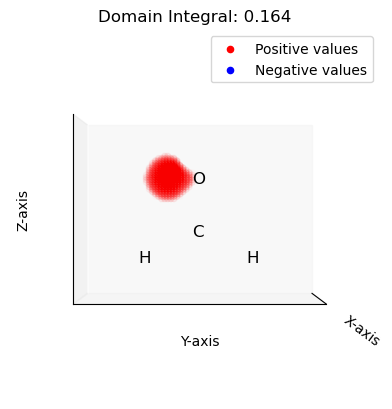

In [15]:
for domain in p_domains:
    domain_vals = dd.copy()
    domain_mask = np.isin(np.arange(len(dd)), domain, invert=True)
    domain_vals[domain_mask] = 0.0

    plot_isosurface(
        uniform_grid,
        domain_vals,
        0.001,
        at_data=mol_data,
        title=f"Domain Integral: {uniform_grid.integrate(domain_vals):.3f}",
        noticks=True,
    )

##### iii. Select and integrate the negative (nucleophilic) domains of the dual descriptor


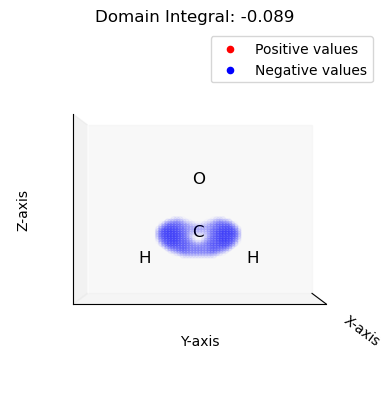

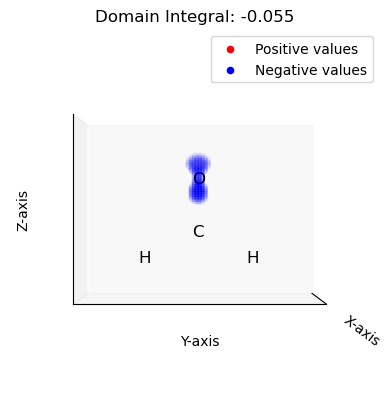

In [16]:
for domain in n_domains:
    domain_vals = dd.copy()
    domain_mask = np.isin(np.arange(len(dd)), domain, invert=True)
    domain_vals[domain_mask] = 0.0

    plot_isosurface(
        uniform_grid,
        domain_vals,
        0.001,
        at_data=mol_data,
        title=f"Domain Integral: {uniform_grid.integrate(domain_vals):.3f}",
        noticks=True,
    )